In [5]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
import time
from datetime import datetime
#from config import gkey
import gmaps

In [7]:
#gmaps.configure(api_key=gkey)

In [8]:
url = "https://jobs.github.com/positions.json?"
page = "page="
page_num = "0"
df_1 = []
df_2 = []
l = []
time = str(datetime.now())

In [9]:
csv = pd.read_csv('uscities_clean.csv')
c_df = pd.DataFrame(csv)

In [10]:
i = 1

while i < 20:
    
    f = (url + page + str(i))
    res = requests.get(f)
    res_json = res.json()
    res_vol = len(res_json)
    
    if (res_vol > 3):
        l = l + res_json
        print(f"Completed API call number {i}")
    else:
        print(f"res was smaller than 3 so we are going to stop the loop and print.")
        print(f"final length of response {len(l)}")
        break
    i += 1

#print(type(l))

Completed API call number 1
Completed API call number 2
Completed API call number 3
Completed API call number 4
Completed API call number 5
Completed API call number 6
res was smaller than 3 so we are going to stop the loop and print.
final length of response 293


In [11]:
l = pd.DataFrame(l)

l2 = l.drop(columns=['url', 'company_url','how_to_apply', 'how_to_apply', 'company_logo'])

# l2.count()

In [12]:
l['location'] = l['location'].replace(
    {'New York, NY': 'New York, New York', 'New York': 'New York, New York', 
     'New York City': 'New York, New York', 'Frankfurt':'Frankfurt, Germany', 
     'Hamburg':'Hamburg, Germany','Barcelona':'Barcelona, Spain', 'Berlin':'Berlin, Germany', 
     'San Francisco': 'San Francisco, CA', 'London':'London, UK', 'Toronto':'Toronto, Canada', 
     'Chicago':'Chicago, IL', 'Den Haag':'Den Haag, Netherlands', 'Austin, Texas':'Austin, TX', 'München':'Munich, Berlin', 
     'Amsterdam':'Amsterdam, Netherlands', 'Eindhoven':'Eindhoven, Netherlands', 'Bremen':'Bremen, Germany', 
     'Munich':'Munich, Germany','Utrecht':'Utrecht, Netherlands','Oberkochen':'Oberkochen, Germany','Stuttgart':'Stuttgart, Germany',
    'Frankfurt  (Main)':'Frankfurt, Germany', 'Warsaw':'Warsaw, Poland', 'Lisbon':'Lisbon, Portugal', 'Nürnberg':'Nürnberg, Germany',
     'New York, New York 10001':'New York, NY', '81829 Munich':'Munich, Germany', 'Barendrecht': 'Barendrecht, Netherlands', 'Fort Collins':'Fort Collins, CO',
     'Buffalo':'Buffalo, NY', 'Los Angeles, CA, USA':'Los Angeles, CA','Portland, Maine':'Portland, ME','Philadelphia':'Philadelphia, PA',
     'Paris France':'Paris, France', 'Hamburg, Deutschland':'Hamburg, Germany', 'Rotterdam':'Rotterdam, Netherlands','Chicago, Illinois':'Chicago, IL', 
     'Budapest':'Budapest, Hungary', 'Bucharest':'Bucharest, Romania', 'San Francisco ':'San Francisco, CA','Remote Job':'Remote', 'Athens':'Athens, Greece',
     'Den Bosch':'Den Bosch, Netherlands','Remote - US':'Remote','Nijverdal':'Nijverdal, Netherlands', 'San Diego':'San Diego, CA','Mill Valley':'Mill Valley, CA',
     'Gothenburg':'Gothenburg, Sweden', 'Gothenburg ':'Gothenburg, Sweden','Redwood City, Ca':'Redwood City, CA', 'Oslo, Norway or Remote':'Remote','Lincoln, NE or Remote':'Remote','Helsinki/Remote':'Remote',
     'Paris - Remote (European Timezone)':'Remote','Miami, Fl or Remote':'Remote','Columbus, Ohio':'Columbus, OH', 'Oberkochen, Germany':'Oberkochen, Germany', 'Palo Alto':'Palo Alto, CA',
     'Cologne - Germany':'Cologne, Germany', 'Phoenix, Atlanta, Remote-US Based':'Remote'
    }) 

In [13]:
new = l["location"].str.split(",", n = 1, expand = True)
l["city"]=new[0]

In [14]:
s = l.merge(c_df, how="left", on="city")
c = pd.DataFrame(s).groupby(by="city").count() #[['lat'],['lng']]

In [15]:
# clean_locations = [x for x in locations if x != 'NaN']
dl = locations.apply (pd.to_numeric, errors='coerce')
dl = dl.dropna()
dl

NameError: name 'locations' is not defined

In [ ]:
sc = s.drop(columns=['company', 'company_logo', 'location', 'company_url', 'created_at','description', 'how_to_apply','id_x','title','type','url','state_id','state_name','county_name','zips','id_y'])
dsc = sc.apply (pd.to_numeric, errors='coerce')
dsc = sc.dropna()

In [17]:
#final_coordinates = dsc.drop(columns='city')

In [19]:
# Create a poverty Heatmap layer 
# fig.add_layer(gmaps.heatmap_layer(locations))
# fig = gmaps.figure()

#heat_layer = gmaps.heatmap_layer(final_coordinates,# weights=location_count, 
                                # dissipating=False, max_intensity=10,
                                # point_radius = 1)

#fig.add_layer(heat_layer)

#plt.savefig("Heatmap4.png")

#fig

In [20]:
job_ct = l2['title'].count()

job_ct

293

In [21]:
eng = len(l2[l2['title'].str.contains('Eng')])
dvlpr = len(l2[l2['title'].str.contains('Dev')])
anlyst = len(l2[l2['title'].str.contains('Analyst')])
science = len(l2[l2['title'].str.contains('Scientist')])
senior = len(l2[l2['title'].str.contains('Sr')])
lead = len(l2[l2['title'].str.contains('Lead')])
remote = len(l2[l2['description'].str.contains('Remote')])
staff = len(l2[l2['title'].str.contains('Staff')])
principal = len(l2[l2['title'].str.contains('Principal')])

In [22]:
l2.insert(5, 'Title Bucket', 'Other')

# jobs =[]

for job in l2.iterrows():
    if 'Analyst' in job[1]['title']:
        job[1]['Title Bucket'] = 'Analyst'
    elif 'ANALYST' in job[1]['title']:
        job[1]['Title Bucket'] = 'Analyst'
    elif 'analyst' in job[1]['title']:
        job[1]['Title Bucket'] = 'Analyst'
    elif 'Scientist' in job[1]['title']:
        job[1]['Title Bucket'] = 'Scientist'
    elif 'scientist' in job[1]['title']:
        job[1]['Title Bucket'] = 'Scientist'
    elif 'SCIENTIST' in job[1]['title']:
        job[1]['Title Bucket'] = 'Scientist'
    elif 'Dev' in job[1]['title']:
        job[1]['Title Bucket'] = 'Developer'
    elif 'dev' in job[1]['title']:
        job[1]['Title Bucket'] = 'Developer'
    elif 'DEV' in job[1]['title']:
        job[1]['Title Bucket'] = 'Developer'
    elif 'Eng' in job[1]['title']:
        job[1]['Title Bucket'] = 'Engineer'
    elif 'eng' in job[1]['title']:
        job[1]['Title Bucket'] = 'Engineer'
    elif 'ENG' in job[1]['title']:
        job[1]['Title Bucket'] = 'Engineer'
    elif 'Staff' in job[1]['title']:
        job[1]['Title Bucket'] = 'Staff'
    elif 'Principal' in job[1]['title']:
        job[1]['Title Bucket'] = 'Principal'
        
l2.head()

,id,type,created_at,company,location,Title Bucket,title,description
0,5ceb7560-3be5-446d-a878-1482a7ff0728,Full Time,Wed Aug 07 19:54:07 UTC 2019,American Physical Society,Ridge,Developer,Software Developer,<p>Who we are</p>\n<p>The American Physical So...
1,3fa12a8e-a0ae-46d1-9601-b78d41e43737,Full Time,Tue Oct 22 18:47:36 UTC 2019,AppraisalFlo,Atlanta,Developer,Senior PHP | MySQL Developer | Remote,<p>Who we are:</p>\n<p>We represent a business...
2,740ce758-53cc-4f3d-88b9-80aaa92e2105,Full Time,Tue Oct 22 17:42:36 UTC 2019,Farm Journal,Chicago,Developer,Software Developer,<p><strong>POSITION DESCRIPTION</strong></p>\n...
3,9e0464b0-a58c-4f37-864f-f8e3fdb8bf6d,Full Time,Tue Oct 22 13:52:28 UTC 2019,Nexient,"Dublin, Ohio, United States, 43016",Other,Salesforce Technical Architect,<p>All of us rely on software in some form in ...
4,2ffe2180-1bf6-4e3f-b7da-f45fd719cbcb,Full Time,Tue Oct 22 08:26:13 UTC 2019,PlusServer GmbH,Köln,Other,Java Entwickler Front- und Backend,<p>Wir bieten die Sicherheit eines Konzerns mi...


In [23]:
l2.insert(6, 'Senior Bucket', 'Other')

for z in l2.iterrows():
    if 'Lead' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Lead'
    elif 'lead' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Lead'
    elif 'LEAD' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Lead'
    elif 'Senior' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    elif 'SENIOR' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    elif 'senior' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    elif 'Sr' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    
l2

,id,type,created_at,company,location,Title Bucket,Senior Bucket,title,description
0,5ceb7560-3be5-446d-a878-1482a7ff0728,Full Time,Wed Aug 07 19:54:07 UTC 2019,American Physical Society,Ridge,Developer,Other,Software Developer,<p>Who we are</p>\n<p>The American Physical So...
1,3fa12a8e-a0ae-46d1-9601-b78d41e43737,Full Time,Tue Oct 22 18:47:36 UTC 2019,AppraisalFlo,Atlanta,Developer,Senior,Senior PHP | MySQL Developer | Remote,<p>Who we are:</p>\n<p>We represent a business...
2,740ce758-53cc-4f3d-88b9-80aaa92e2105,Full Time,Tue Oct 22 17:42:36 UTC 2019,Farm Journal,Chicago,Developer,Other,Software Developer,<p><strong>POSITION DESCRIPTION</strong></p>\n...
3,9e0464b0-a58c-4f37-864f-f8e3fdb8bf6d,Full Time,Tue Oct 22 13:52:28 UTC 2019,Nexient,"Dublin, Ohio, United States, 43016",Other,Other,Salesforce Technical Architect,<p>All of us rely on software in some form in ...
4,2ffe2180-1bf6-4e3f-b7da-f45fd719cbcb,Full Time,Tue Oct 22 08:26:13 UTC 2019,PlusServer GmbH,Köln,Other,Other,Java Entwickler Front- und Backend,<p>Wir bieten die Sicherheit eines Konzerns mi...
...,...,...,...,...,...,...,...,...,...
288,40ca8a98-a4bb-11e8-9a40-f75b414612e1,Full Time,Mon Oct 22 16:33:37 UTC 2018,Reaktor,New York,Developer,Other,A Challenge for Developers: Solve the Tracking...,<p><strong>Reaktor is looking for developers w...
289,df5b47be-d612-11e8-88f4-50633736745c,Full Time,Mon Oct 22 15:56:13 UTC 2018,Constructive,New York City,Other,Lead,"Technology Team Lead, Design Agency for Social...","<p>Constructive (<a href=""https://constructive..."
290,da8ad94e-d5f8-11e8-8225-f199d46197fd,Full Time,Mon Oct 22 12:49:21 UTC 2018,www.FaktorZehn.com,München,Other,Senior,Senior Software Entwickler Java (m/w/d),<p>Lust auf Veränderung?</p>\n<p>Du bist ein J...
291,95048694-1952-11e8-86d5-38e7f24d7ed9,Full Time,Sun Oct 21 23:46:24 UTC 2018,Analytics Fire,Remote,Developer,Senior,SENIOR FULL-STACK DEV WITH RUBY/PYTHON/REACT -...,<p><strong>Job Description</strong></p>\n<p>An...


In [24]:
l2.insert(6, 'Remote?', 'Onsite')

for a in l2.iterrows():
    if 'Remote' in a[1]['location'] or 'Remote' in a[1]['title']:
        a[1]['Remote?'] = 'Remote'
    elif 'Remote' in a[1]['location'] or 'Remote' in a[1]['title']:
        a[1['Remote?']] = 'Remote'
    elif 'Remote' in a[1]['location'] or 'Remote' in a[1]['title']:
        a[1]['Remote?'] = 'Remote'
        
l2

,id,type,created_at,company,location,Title Bucket,Remote?,Senior Bucket,title,description
0,5ceb7560-3be5-446d-a878-1482a7ff0728,Full Time,Wed Aug 07 19:54:07 UTC 2019,American Physical Society,Ridge,Developer,Onsite,Other,Software Developer,<p>Who we are</p>\n<p>The American Physical So...
1,3fa12a8e-a0ae-46d1-9601-b78d41e43737,Full Time,Tue Oct 22 18:47:36 UTC 2019,AppraisalFlo,Atlanta,Developer,Remote,Senior,Senior PHP | MySQL Developer | Remote,<p>Who we are:</p>\n<p>We represent a business...
2,740ce758-53cc-4f3d-88b9-80aaa92e2105,Full Time,Tue Oct 22 17:42:36 UTC 2019,Farm Journal,Chicago,Developer,Onsite,Other,Software Developer,<p><strong>POSITION DESCRIPTION</strong></p>\n...
3,9e0464b0-a58c-4f37-864f-f8e3fdb8bf6d,Full Time,Tue Oct 22 13:52:28 UTC 2019,Nexient,"Dublin, Ohio, United States, 43016",Other,Onsite,Other,Salesforce Technical Architect,<p>All of us rely on software in some form in ...
4,2ffe2180-1bf6-4e3f-b7da-f45fd719cbcb,Full Time,Tue Oct 22 08:26:13 UTC 2019,PlusServer GmbH,Köln,Other,Onsite,Other,Java Entwickler Front- und Backend,<p>Wir bieten die Sicherheit eines Konzerns mi...
...,...,...,...,...,...,...,...,...,...,...
288,40ca8a98-a4bb-11e8-9a40-f75b414612e1,Full Time,Mon Oct 22 16:33:37 UTC 2018,Reaktor,New York,Developer,Onsite,Other,A Challenge for Developers: Solve the Tracking...,<p><strong>Reaktor is looking for developers w...
289,df5b47be-d612-11e8-88f4-50633736745c,Full Time,Mon Oct 22 15:56:13 UTC 2018,Constructive,New York City,Other,Onsite,Lead,"Technology Team Lead, Design Agency for Social...","<p>Constructive (<a href=""https://constructive..."
290,da8ad94e-d5f8-11e8-8225-f199d46197fd,Full Time,Mon Oct 22 12:49:21 UTC 2018,www.FaktorZehn.com,München,Other,Onsite,Senior,Senior Software Entwickler Java (m/w/d),<p>Lust auf Veränderung?</p>\n<p>Du bist ein J...
291,95048694-1952-11e8-86d5-38e7f24d7ed9,Full Time,Sun Oct 21 23:46:24 UTC 2018,Analytics Fire,Remote,Developer,Remote,Senior,SENIOR FULL-STACK DEV WITH RUBY/PYTHON/REACT -...,<p><strong>Job Description</strong></p>\n<p>An...


In [25]:
l2.insert(7, 'Degree Indication', 'None Listed')

for c in l2.iterrows():
    if 'Master' in c[1]['description']:
        c[1]['Degree Indication'] = 'Master'
    elif 'master' in c[1]['description']:
        c[1]['Degree Indication'] = 'Master'
    elif 'Bachelor' in c[1]['description']:
        c[1]['Degree Indication'] = 'Bachelor'
    elif 'bachelor' in c[1]['description']:
        c[1]['Degree Indication'] = 'Bachelor'
    elif 'camp' in c[1]['description']:
        c[1]['Degree Indication'] = 'Bootcamp'
l2

,id,type,created_at,company,location,Title Bucket,Remote?,Degree Indication,Senior Bucket,title,description
0,5ceb7560-3be5-446d-a878-1482a7ff0728,Full Time,Wed Aug 07 19:54:07 UTC 2019,American Physical Society,Ridge,Developer,Onsite,None Listed,Other,Software Developer,<p>Who we are</p>\n<p>The American Physical So...
1,3fa12a8e-a0ae-46d1-9601-b78d41e43737,Full Time,Tue Oct 22 18:47:36 UTC 2019,AppraisalFlo,Atlanta,Developer,Remote,Bachelor,Senior,Senior PHP | MySQL Developer | Remote,<p>Who we are:</p>\n<p>We represent a business...
2,740ce758-53cc-4f3d-88b9-80aaa92e2105,Full Time,Tue Oct 22 17:42:36 UTC 2019,Farm Journal,Chicago,Developer,Onsite,None Listed,Other,Software Developer,<p><strong>POSITION DESCRIPTION</strong></p>\n...
3,9e0464b0-a58c-4f37-864f-f8e3fdb8bf6d,Full Time,Tue Oct 22 13:52:28 UTC 2019,Nexient,"Dublin, Ohio, United States, 43016",Other,Onsite,None Listed,Other,Salesforce Technical Architect,<p>All of us rely on software in some form in ...
4,2ffe2180-1bf6-4e3f-b7da-f45fd719cbcb,Full Time,Tue Oct 22 08:26:13 UTC 2019,PlusServer GmbH,Köln,Other,Onsite,None Listed,Other,Java Entwickler Front- und Backend,<p>Wir bieten die Sicherheit eines Konzerns mi...
...,...,...,...,...,...,...,...,...,...,...,...
288,40ca8a98-a4bb-11e8-9a40-f75b414612e1,Full Time,Mon Oct 22 16:33:37 UTC 2018,Reaktor,New York,Developer,Onsite,None Listed,Other,A Challenge for Developers: Solve the Tracking...,<p><strong>Reaktor is looking for developers w...
289,df5b47be-d612-11e8-88f4-50633736745c,Full Time,Mon Oct 22 15:56:13 UTC 2018,Constructive,New York City,Other,Onsite,None Listed,Lead,"Technology Team Lead, Design Agency for Social...","<p>Constructive (<a href=""https://constructive..."
290,da8ad94e-d5f8-11e8-8225-f199d46197fd,Full Time,Mon Oct 22 12:49:21 UTC 2018,www.FaktorZehn.com,München,Other,Onsite,None Listed,Senior,Senior Software Entwickler Java (m/w/d),<p>Lust auf Veränderung?</p>\n<p>Du bist ein J...
291,95048694-1952-11e8-86d5-38e7f24d7ed9,Full Time,Sun Oct 21 23:46:24 UTC 2018,Analytics Fire,Remote,Developer,Remote,None Listed,Senior,SENIOR FULL-STACK DEV WITH RUBY/PYTHON/REACT -...,<p><strong>Job Description</strong></p>\n<p>An...


In [26]:
sorted_df = l2.sort_values(['Degree Indication'])
bootcamp = sorted_df['Degree Indication']
sorted_df

,id,type,created_at,company,location,Title Bucket,Remote?,Degree Indication,Senior Bucket,title,description
170,45296f64-ec32-11e8-9e1b-5d24b20f1c0f,Full Time,Mon Nov 19 19:40:01 UTC 2018,Prosek Partners,"Fairfield, CT",Developer,Onsite,Bachelor,Other,Front End Developer,"<p>Background</p>\n<p>Prosek Partners, one of ..."
54,fa53ecb5-45f9-4242-a662-1858fcff966a,Full Time,Fri Oct 11 22:58:27 UTC 2019,"Gurtin Municipal Bond Management, a PIMCO Company",San Diego,Developer,Onsite,Bachelor,Other,"Full Stack Developer, C# and Angular",<p>Job Description:\nGurtin Municipal Bond Man...
182,93a08496-e9c8-11e8-8e1e-09934e650343,Full Time,Fri Nov 16 17:55:45 UTC 2018,Target,"Minneapolis, MN",Other,Onsite,Bachelor,Senior,Sr Ad Ops Manager,"<p>Target is an iconic brand, a Fortune 50 com..."
29,5086af3e-a27d-40d8-b443-d607a950088d,Full Time,Wed Oct 16 20:44:19 UTC 2019,Lift & Co.,Toronto,Engineer,Onsite,Bachelor,Other,Data Engineer,<p><strong>Data Engineer</strong></p>\n<p><str...
31,cb24f618-6f83-47eb-8685-113b3448d616,Full Time,Wed Oct 16 13:21:06 UTC 2019,Pacific Life,"Aliso Viejo, CA",Engineer,Onsite,Bachelor,Lead,Software Solutions Engineer/Lead/Architect-Java,"<p>For more than 150 years, Pacific Life has o..."
...,...,...,...,...,...,...,...,...,...,...,...
127,99ab7a83-f075-4c44-a197-4954598d660a,Full Time,Fri Sep 27 12:06:44 UTC 2019,Impero Software,Remote,Engineer,Remote,None Listed,Senior,Senior Software Engineer (Chrome),"<p>At Impero, we've been in Education Technolo..."
128,da96859d-2d4e-4b01-9214-04f29239e5f7,Full Time,Fri Sep 27 10:36:21 UTC 2019,Impero Software,Remote,Engineer,Remote,None Listed,Senior,Senior Automated Test Engineer,"<p>At Impero, we've been in Education Technolo..."
129,d43f9147-973b-4277-9146-9009db675e92,Full Time,Fri Sep 27 10:29:39 UTC 2019,Impero Software,Remote,Engineer,Remote,None Listed,Senior,Senior Web Engineer (Ruby on Rails),"<p>At Impero, we've been in Education Technolo..."
131,9e032cc0-8abc-4848-a089-bb1f36293219,Full Time,Fri Sep 27 09:50:06 UTC 2019,GOhiring GmbH,Berlin,Developer,Onsite,None Listed,Senior,Senior Fullstack Ruby / JS Developer,<p><strong>About us</strong></p>\n<p>We are lo...


In [27]:
rmt_ct = len(sorted_df[sorted_df['Remote?'].str.contains('Remote')])
onsite_ct = len(sorted_df[sorted_df['Remote?'].str.contains('Onsite')])

prct_remote = ((rmt_ct / job_ct) * 100)
prct_onsite = ((onsite_ct / job_ct) * 100)

rmt_df = pd.DataFrame({'Remote %': [prct_remote],'Remote Count': [rmt_ct],
                       'Onsite %': [prct_onsite],'Onsite Count': [onsite_ct]})

rmt_df.head()

,Remote %,Remote Count,Onsite %,Onsite Count
0,13.31058,39,86.68942,254


/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


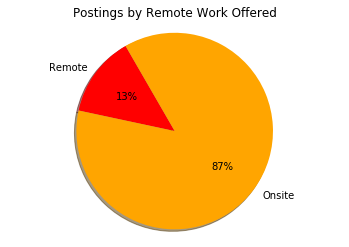

In [28]:
remote = ['Remote', 'Onsite']
remote_jobs = [rmt_df['Remote %'], rmt_df['Onsite %']]
colors = ["red","orange"]

explode = (0,0)

plt.pie(remote_jobs, labels=remote, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=120)

plt.title('Postings by Remote Work Offered')
plt.axis("equal")
plt.savefig("../remote_jobs.png")
plt.show()

In [29]:
sr_ct = len(sorted_df[sorted_df['Senior Bucket'].str.contains('Senior')])
lead_ct = len(sorted_df[sorted_df['Senior Bucket'].str.contains('Lead')])
other_ct = len(sorted_df[sorted_df['Senior Bucket'].str.contains('Other')])

sr_prct = ((sr_ct / job_ct) * 100)
lead_prct = ((lead_ct / job_ct) * 100)
other_prct = ((other_ct / job_ct) * 100)

sr_df = pd.DataFrame({'Senior Job %': [sr_prct],'Senior Jobs': [sr_ct],
'Lead Job %': [lead_prct], 'Lead Jobs': [lead_ct], 'Junior/Other Job %': [other_prct],
'Junior/Other Jobs': [other_ct]})

sr_df

,Senior Job %,Senior Jobs,Lead Job %,Lead Jobs,Junior/Other Job %,Junior/Other Jobs
0,31.05802,91,5.460751,16,63.481229,186


/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


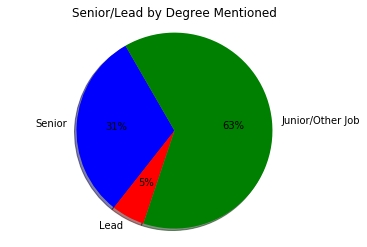

In [30]:
manager = ['Senior', 'Lead', 'Junior/Other Job']
lead_jobs = [sr_df['Senior Job %'], sr_df['Lead Job %'],
               sr_df['Junior/Other Job %']]
colors = ["blue","red","green"]
explode = (0,0,0)

plt.pie(lead_jobs, labels=manager, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=120)

plt.title('Senior/Lead by Degree Mentioned')
plt.axis("equal")
plt.savefig("../senior_jobs.png")
plt.show()

In [31]:
# sorted_df = sorted_df.reset_index()
analyst_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Analyst')])
eng_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Engineer')])
dvlpr_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Developer')])
scientist_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Scientist')])
staff_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Staff')])
principal_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Scientist')])
other2_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Other')])

analyst_prct = ((analyst_ct / job_ct) * 100)
eng_prct = ((eng_ct / job_ct) * 100)
dvlpr_prct = ((dvlpr_ct / job_ct) * 100)
scientist_prct = ((scientist_ct / job_ct) * 100)
staff_prct = ((staff_ct / job_ct) * 100)
principal_prct = ((principal_ct / job_ct) * 100)
other2_prct = ((other2_ct / job_ct) * 100)
 

title_df = pd.DataFrame({'Analyst Job %': [analyst_prct],'Analyst Jobs': [analyst_ct],
'Engineer Job %': [eng_prct], 'Engineer Jobs': [eng_ct], 'Developer Job %': [dvlpr_prct],
'Developer Jobs': [dvlpr_ct], 'Scientist Job %': [scientist_prct], 'Scientist Jobs': [scientist_ct],
'Staff Jobs': [staff_ct], 'Staff Job %': [staff_prct], 'Principal Jobs': [principal_ct], 'Principal Job %':
[principal_prct], 'Other Jobs': [other2_ct], 'Other Job %': [other2_prct]})

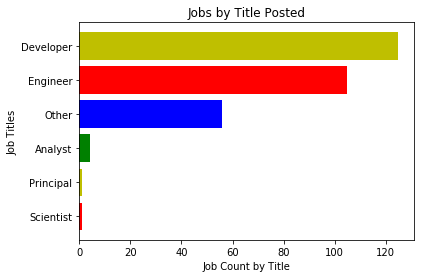

<Figure size 432x288 with 0 Axes>

In [32]:
job_titles = [scientist_ct, principal_ct, analyst_ct, other2_ct,
              eng_ct, dvlpr_ct]
titles = ['Scientist', 'Principal', 'Analyst', 'Other', 'Engineer', 'Developer']
y_pos = np.arange(len(titles))
 
# Create horizontal bars
plt.barh(y_pos, job_titles, color='rygb', zorder=2)
 
# Create names on the y-axis
plt.yticks(y_pos, titles)
plt.xlabel("Job Count by Title")
plt.ylabel("Job Titles")
plt.title('Jobs by Title Posted')
 
# Show graphic
plt.show()
plt.savefig("../jobs_by_title.png")
titles = ['Engineer', 'Developer', 'Analyst', 'Scientist', 'Staff', 'Principal', 'Other']
job_titles = [eng_ct, dvlpr_ct, other2_ct,
              analyst_ct, staff_ct, principal_ct,
              scientist_ct]



In [33]:
# Degree Preference

master_ct = len(l2[l2['Degree Indication'].str.contains("Master")])
master_prct = (master_ct / job_ct) * 100

bach_ct = len(l2[l2['Degree Indication'].str.contains('Bachelor')])
bach_prct = (bach_ct / job_ct) * 100

boot_ct = len(l2[l2['Degree Indication'].str.contains('Bootcamp')])
boot_prct = (boot_ct / job_ct) * 100

none_ct = len(l2[l2['Degree Indication'].str.contains('None Listed')])
none_prct = (none_ct / job_ct) * 100

degree_df = pd.DataFrame({'Master Job Percent': [master_prct], 'Bachelor Job Percent': [bach_prct],
                          'Bootcamp Job Percent': [boot_prct], 'No Degree Listed Job Percent': [none_prct]})

/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


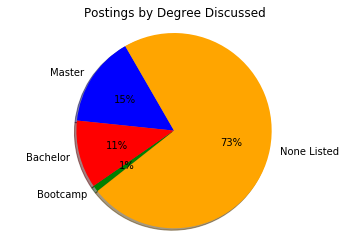

In [34]:
degrees = ['Master', 'Bachelor', 'Bootcamp', 'None Listed']
degree_jobs = [degree_df['Master Job Percent'], degree_df['Bachelor Job Percent'],
               degree_df['Bootcamp Job Percent'], degree_df['No Degree Listed Job Percent']]
colors = ["blue","red","green","orange"]
explode = (0,0,0,0)

plt.pie(degree_jobs, labels=degrees, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=120)

plt.title('Postings by Degree Discussed')
plt.axis("equal")
plt.savefig("../jobs_by_degree.png")
plt.show()

In [35]:
# Benefits

child_ct = len(l2[l2['description'].str.contains('Child')])
child2_ct = len(l2[l2['description'].str.contains('child')])
total_child = child_ct + child2_ct
child_prct = (total_child / job_ct) * 100

stock_ct = len(l2[l2['description'].str.contains('Stock')])
stock2_ct = len(l2[l2['description'].str.contains('stock')])
total_stock = stock_ct + stock2_ct
stock_prct = (total_stock / job_ct) * 100

comp_ct = len(l2[l2['description'].str.contains('Competitive salary')])
comp2_ct = len(l2[l2['description'].str.contains('competitive salary')])
comp3_ct = len(l2[l2['description'].str.contains('competitive compensation package')])
total_comp = comp_ct + comp2_ct + comp3_ct
comp_prct = (total_comp / job_ct) * 100

benefit_df = pd.DataFrame({'Offers Stock Options': [total_stock], 'Offers Child Care': [total_child],
                           'Stock Option %': [stock_prct], 'Child Care %': [child_prct],
                          'Competitive Salaries': [total_comp], 'Competitive Salary by %': [comp_prct]})

benefit_df

,Offers Stock Options,Offers Child Care,Stock Option %,Child Care %,Competitive Salaries,Competitive Salary by %
0,12,12,4.095563,4.095563,33,11.262799


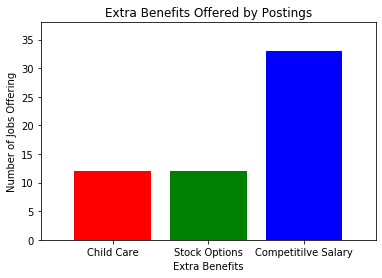

In [36]:
benefits = ['Child Care', 'Stock Options', 'Competitilve Salary']
benefit_cts = [total_stock, total_child,
               total_comp]
x_axis = np.arange(len(benefits))
 
# Create horizontal bars
plt.bar(x_axis, benefit_cts, color='rgb', zorder=2)
 
# Create names on the y-axis
plt.xticks(x_axis, benefits)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Extra Benefits")
plt.ylabel("Number of Jobs Offering")
plt.ylim(0, max(benefit_cts)+5)
plt.title("Extra Benefits Offered by Postings")
 
# Show graphic
plt.savefig("../benefits_by_job.png")
plt.show()

In [37]:
grouped1 = sorted_df.groupby(['Degree Indication', 'Senior Bucket'])

bach_lead = 0
bach_sr = 0
master_lead = 0
master_sr = 0

for d in l2.iterrows():
    if 'Bachelor' in d[1]['Degree Indication'] and 'Lead' in d[1]['Senior Bucket']:
        bach_lead += 1
    elif 'Bachelor' in d[1]['Degree Indication'] and 'Senior' in d[1]['Senior Bucket']:
        bach_sr += 1
    elif 'Master' in d[1]['Degree Indication'] and 'Lead' in d[1]['Senior Bucket']:
        master_lead += 1
    elif 'Master' in d[1]['Degree Indication'] and 'Senior' in d[1]['Senior Bucket']:
        master_sr += 1

In [38]:
grouped2 = sorted_df.groupby(['Degree Indication', 'Title Bucket'])

bach_analyst = 0
bach_dvlpr = 0
bach_eng = 0
master_analyst = 0
master_dvlpr = 0
master_eng = 0

for e in sorted_df.iterrows():
    if 'Bachelor' in e[1]['Degree Indication'] and 'Analyst' in e[1]['Title Bucket']:
        bach_analyst += 1
    elif 'Bachelor' in e[1]['Degree Indication'] and 'Developer' in e[1]['Title Bucket']:
        bach_dvlpr += 1
    elif 'Bachelor' in e[1]['Degree Indication'] and 'Engineer' in e[1]['Title Bucket']:
        bach_eng += 1
    elif 'Master' in e[1]['Degree Indication'] and 'Analyst' in e[1]['Title Bucket']:
        master_analyst += 1
    elif 'Master' in e[1]['Degree Indication'] and 'Developer' in e[1]['Title Bucket']:
        master_dvlpr += 1
    elif 'Master' in e[1]['Degree Indication'] and 'Engineer' in e[1]['Title Bucket']:
        master_eng += 1

In [39]:
# Null hypothesis. If there is no correlation between degree level and working remote, 
# we should see no relationship between remote work jobs and degree level

grouped2 = sorted_df.groupby(['Degree Indication', 'Title Bucket'])

bach_remote = 0
bach_onsite = 0
master_remote = 0
master_onsite = 0
none_remote = 0
none_onsite = 0

for f in sorted_df.iterrows():
    if 'Bachelor' in f[1]['Degree Indication'] and 'Remote' in f[1]['Remote?']:
        bach_remote += 1
    elif 'Bachelor' in f[1]['Degree Indication'] and 'Onsite' in f[1]['Remote?']:
        bach_onsite += 1
    elif 'Master' in f[1]['Degree Indication'] and 'Remote' in f[1]['Remote?']:
        master_remote += 1
    elif 'Master' in f[1]['Degree Indication'] and 'Onsite' in f[1]['Remote?']:
        master_onsite += 1
    elif 'None Listed' in f[1]['Degree Indication'] and 'Remote' in f[1]['Remote?']:
        none_remote += 1
    elif 'None Listed' in f[1]['Degree Indication'] and 'Onsite' in f[1]['Remote?']:
        none_onsite += 1

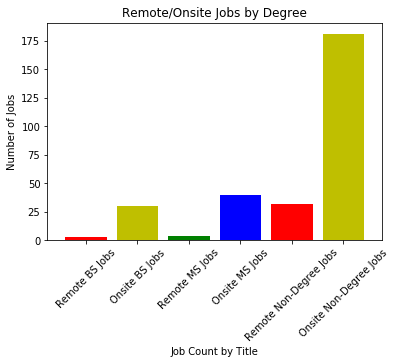

<Figure size 432x288 with 0 Axes>

In [43]:
# Degree breakdown pie chart
rmt_deg = ['Remote BS Jobs', 'Onsite BS Jobs', 'Remote MS Jobs',
           'Onsite MS Jobs', 'Remote Non-Degree Jobs', 'Onsite Non-Degree Jobs']
remote_onsite = [bach_remote, bach_onsite, master_remote, master_onsite,
           none_remote, none_onsite]
x_axis = np.arange(len(rmt_deg))
 
# Create horizontal bars
plt.bar(x_axis, remote_onsite, color='rygb', zorder=2)
 
# Create names on the y-axis
plt.xticks(x_axis, rmt_deg, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Job Count by Title")
plt.ylabel("Number of Jobs")
plt.ylim(0, max(remote_onsite)+10)
plt.title("Remote/Onsite Jobs by Degree")
 
# Show graphic
plt.show()
plt.savefig("../remote_by_degree.png")